In [1]:
! ls

7C71A941-6583-4F77-8D4B-90BB6A3B32F4.jpeg
7EDCE63D-2234-4D07-9384-E8AD572D4497.jpeg
fusion-Copy1.ipynb
fusion.ipynb
pix.png


In [5]:
# ! pip3 install matplotlib numpy opencv-python

In [6]:
import matplotlib.pyplot as plt #importing matplotlib
import numpy as np
import cv2


In [7]:
vis_img = plt.imread('7C71A941-6583-4F77-8D4B-90BB6A3B32F4.jpeg') #reads image data
ir_img = plt.imread('7EDCE63D-2234-4D07-9384-E8AD572D4497.jpeg') #reads image data


# Рис. 6.

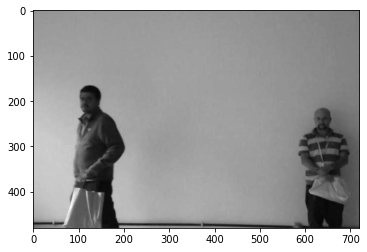

In [8]:
# image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(vis_img, cmap="gray")
plt.show()

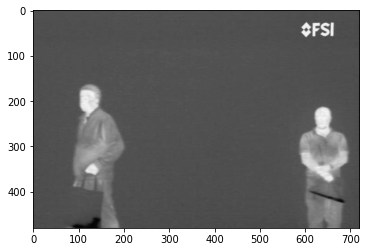

In [9]:
plt.imshow(ir_img, cmap="gray")
plt.show()

# Рис. 7.

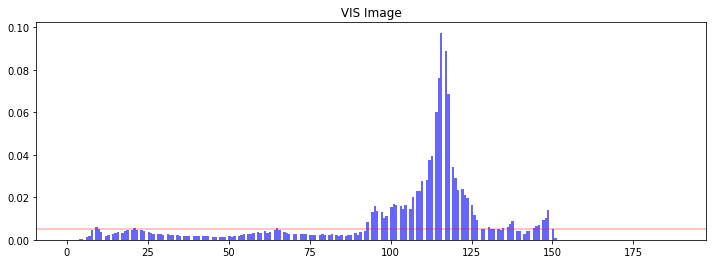

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))


# Generate some data for this demonstration.
data = vis_img.ravel()

# Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# Plot the histogram.
val_vis, _, _ = plt.hist(data, bins=256, alpha=0.6, density=True, color='b')
# plt.xticks(range(256),fontsize=5, rotation=90)
# plt.yticks([x/500 for x in range(1,50,1)],fontsize=7, rotation=0)

plt.axhline(y = 0.005, color = 'r', linestyle = '-', alpha=0.3)

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 256)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
title = " VIS Image " 
plt.title(title)


plt.show()

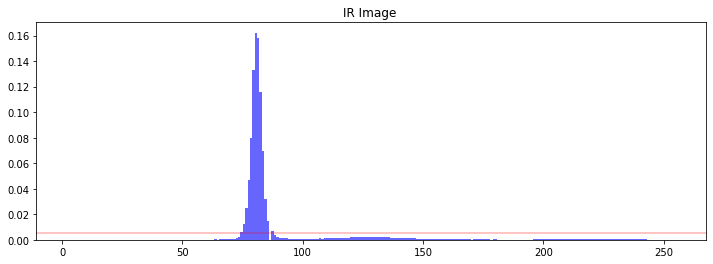

In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))


# Generate some data for this demonstration.
data = ir_img.ravel()

# Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# Plot the histogram.
val_vis, _, _ = plt.hist(data, bins=256, alpha=0.6, density=True, color='b')
# plt.xticks(range(256),fontsize=5, rotation=90)
# plt.yticks([x/500 for x in range(1,50,1)],fontsize=7, rotation=0)

plt.axhline(y = 0.005, color = 'r', linestyle = '-', alpha=0.3)

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 256)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
title = "IR Image " 
plt.title(title)


plt.show()

In [12]:
from collections import Counter
import itertools



def prob(c, a, x):
    
    # returns the probability of a given number a
    return float(c[a]) / len(x)

def removeDuplicates(lst):
     
    return [t for t in (set(tuple(i) for i in lst))]
         
def val_prob_min(img, perc):

    x = img.ravel()
    c = Counter(x)
    
    ans = [(v, prob(c, v,x))  for v in x]
    
    cleans_ans = removeDuplicates(ans)
#     print(cleans_ans[:5])
#     print('min')
    
    sorted_ans = sorted(
    cleans_ans, 
    key=lambda x: x[0]
    )
#     print(sorted_ans[:5])
#     print('min')

    A = [i for i in sorted_ans if i[1] >= perc][:10]
 
    return A

def val_prob_max(img, perc):

    x = img.ravel()
    c = Counter(x)
    
    ans = [(v, prob(c, v,x))  for v in x]
    
    cleans_ans = removeDuplicates(ans)
    
    sorted_ans = sorted(
    cleans_ans, 
    key=lambda x: x[0],
    reverse=True
    )
    

    A = [i for i in sorted_ans if i[1] <= perc][:10]
 
    return A

def reg(img, t=0.004):
    new_img = []
    min_val = val_prob_min(img, t)[0][0]
    max_val = val_prob_max(img, t)[0][0]
    
    for i in img:
#         print(i, min_val)
        if i < min_val:
            new_img.append(0)
        elif i > min_val and i < max_val:
            val = round((255*(i-min_val))/(max_val-min_val))
            new_img.append(val)
        else:
            new_img.append(255)
            
    return new_img

In [13]:
vis_img.ravel()[:5]

array([109, 109, 109, 109, 109], dtype=uint8)

In [14]:
val_prob_min(vis_img, 0.005)

[(93, 0.006105324074074074),
 (94, 0.00953125),
 (95, 0.011646412037037037),
 (96, 0.010112847222222223),
 (97, 0.009733796296296296),
 (98, 0.0074826388888888885),
 (99, 0.008098958333333333),
 (100, 0.01119212962962963),
 (101, 0.012239583333333333),
 (102, 0.011912615740740741)]

In [15]:
val_prob_max(vis_img, 0.005)

[(188, 5.787037037037037e-06),
 (187, 5.787037037037037e-06),
 (186, 1.736111111111111e-05),
 (185, 1.1574074074074073e-05),
 (184, 8.680555555555556e-06),
 (183, 1.1574074074074073e-05),
 (182, 2.3148148148148147e-05),
 (181, 2.025462962962963e-05),
 (180, 3.18287037037037e-05),
 (179, 3.18287037037037e-05)]

# Рис. 9.

In [16]:
mosaik1 = []

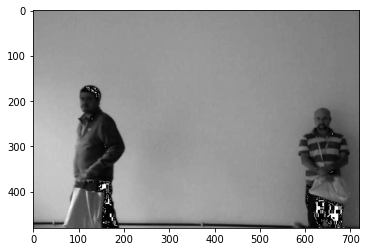

In [17]:
new_img = reg(vis_img.ravel())
vis_new = np.array(new_img).reshape(480,720)
plt.imshow(vis_new, cmap="gray")
plt.show()

mosaik1.append(vis_new)

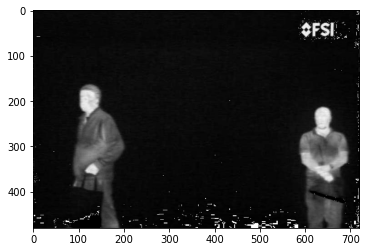

In [18]:
new_img = reg(ir_img.ravel())
ir_new = np.array(new_img).reshape(480,720)
plt.imshow(ir_new, cmap="gray")
plt.show()

mosaik1.append(ir_new)

In [19]:
len(new_img)/480

720.0

# Рис. 10.

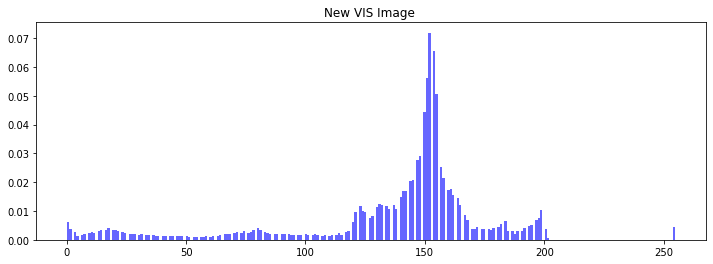

In [20]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))


# Generate some data for this demonstration.
data = vis_new.ravel()

# Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# Plot the histogram.
val_vis, _, _ = plt.hist(data, bins=256, density=True, alpha=0.6, color='b')

title = "New VIS Image " 
plt.title(title)


plt.show()

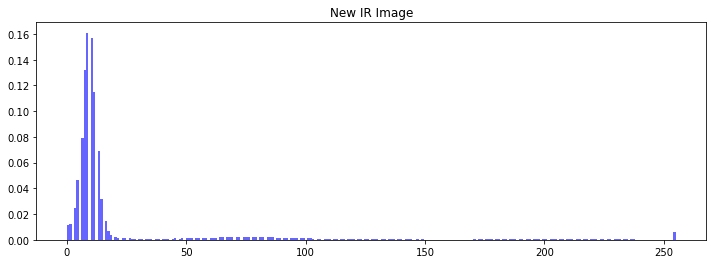

In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

data = ir_new.ravel()

val_vis, _, _ = plt.hist(data, bins=256, density=True, alpha=0.6, color='b')

title = "New IR Image" 
plt.title(title)

plt.show()

# Рис. 13.

<Figure size 504x360 with 0 Axes>

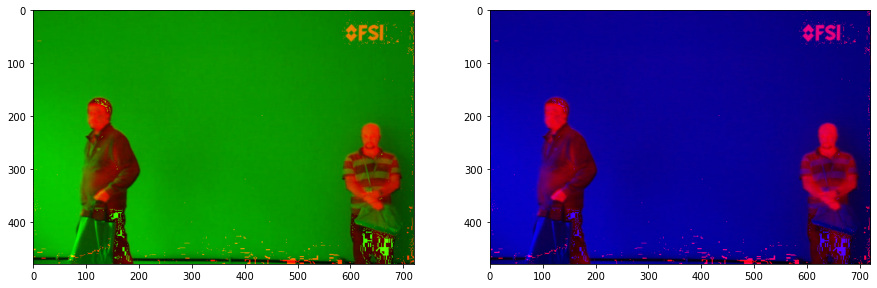

In [53]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2, figsize=(15, 15)) 

r = ir_new
g = vis_new
b = np.array([0] * 345600).reshape(480,720)

# rgb = np.dstack((r,g,b))  # stacks 3 h x w arrays -> h x w x 3
rgb_uint8 = (np.dstack((r,g,b))) .astype(np.uint8)  # right, Janna, not 256

mosaik1.append(rgb_uint8)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(rgb_uint8)

r = ir_new
g = np.array([0] * 345600).reshape(480,-1)
b = vis_new

rgb2 = np.dstack((r,g,b))  # stacks 3 h x w arrays -> h x w x 3
rgb_uint82 = (np.dstack((r,g,b))) .astype(np.uint8)  # right, Janna, not 256

axarr[1].imshow(rgb_uint82)

mosaik1.append(rgb_uint82)


In [54]:
# rgb_uint8[:,:,2]

# Рис. 14.

<Figure size 504x360 with 0 Axes>

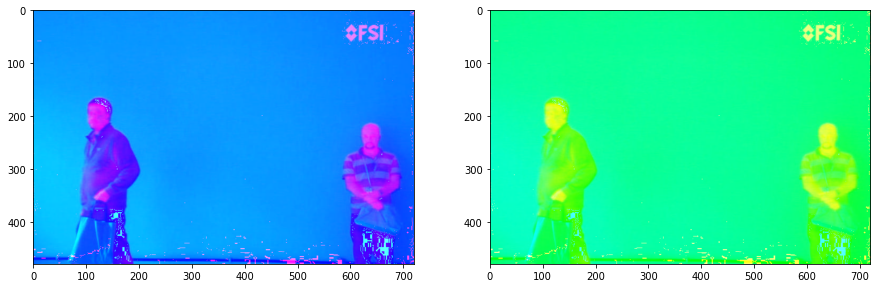

In [55]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2, figsize=(15, 15)) 

r = ir_new
g = vis_new
b = np.array([255] * 345600).reshape(480,720)

rgb = np.dstack((r,g,b))  # stacks 3 h x w arrays -> h x w x 3
rgb_uint8 = (np.dstack((r,g,b))) .astype(np.uint8)  # right, Janna, not 256

mosaik1.append(rgb_uint8)


# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(rgb_uint8)

r = ir_new
b = vis_new
g = np.array([255] * 345600).reshape(480,720)

rgb_uint82 = (np.dstack((r,g,b))).astype(np.uint8) 

axarr[1].imshow(rgb_uint82)

mosaik1.append(rgb_uint82)


# Рис. 15.

<Figure size 504x360 with 0 Axes>

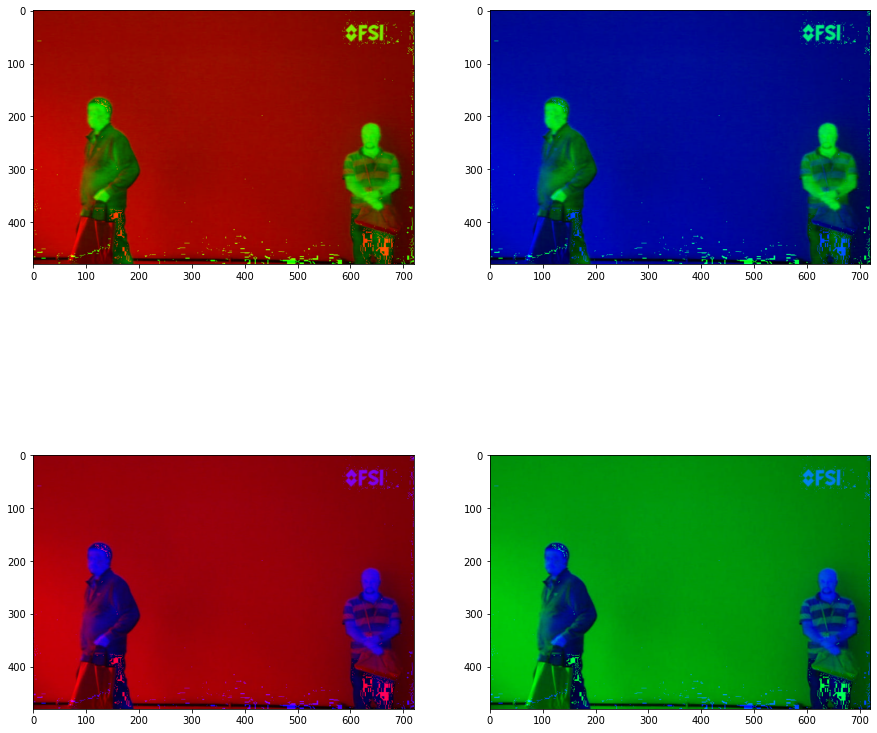

In [56]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,2, figsize=(15, 15)) 


i = ir_new
v = vis_new
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)


channels = [(v, i, z), (z, i, v), (v, z, i), (z, v, i)]

axarr = axarr.flatten()


for i, v in enumerate(channels):
    
    rgb_uint8 = (np.dstack(v)).astype(np.uint8) 


    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(rgb_uint8)
    
    
    mosaik1.append(rgb_uint8)



# Рис. 16.

<Figure size 504x360 with 0 Axes>

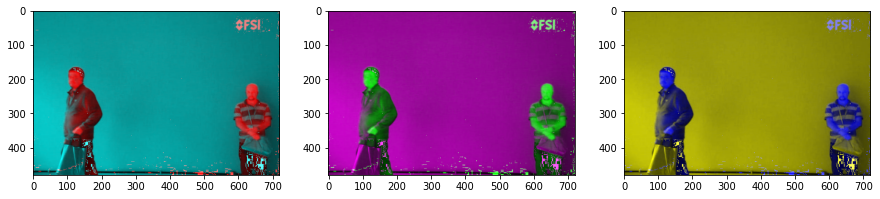

In [57]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3, figsize=(15, 15)) 


i = ir_new
v = vis_new
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)


channels = [(i, v, v), (v, i, v), (v, v, i)]

axarr = axarr.flatten()


for i, v in enumerate(channels):
    
    rgb_uint8 = (np.dstack(v)).astype(np.uint8)  


    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(rgb_uint8)
    
    mosaik1.append(rgb_uint8)


# Рис. 17.

<Figure size 504x360 with 0 Axes>

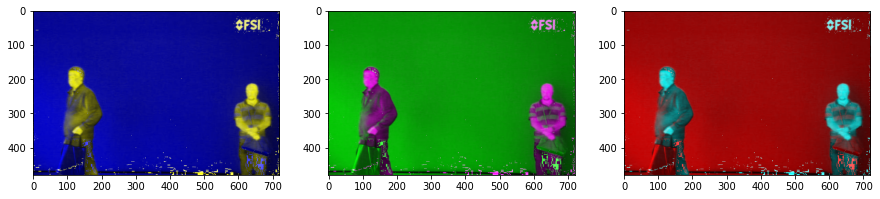

In [58]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3, figsize=(15, 15)) 


i = ir_new
v = vis_new
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)


channels = [(i, i, v), (i, v, i), (v, i, i)]

axarr = axarr.flatten()


for i, v in enumerate(channels):
    
    rgb_uint8 = (np.dstack(v)).astype(np.uint8) 


    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(rgb_uint8)
    
    mosaik1.append(rgb_uint8)



In [59]:
len(mosaik1)

30

<Figure size 504x360 with 0 Axes>

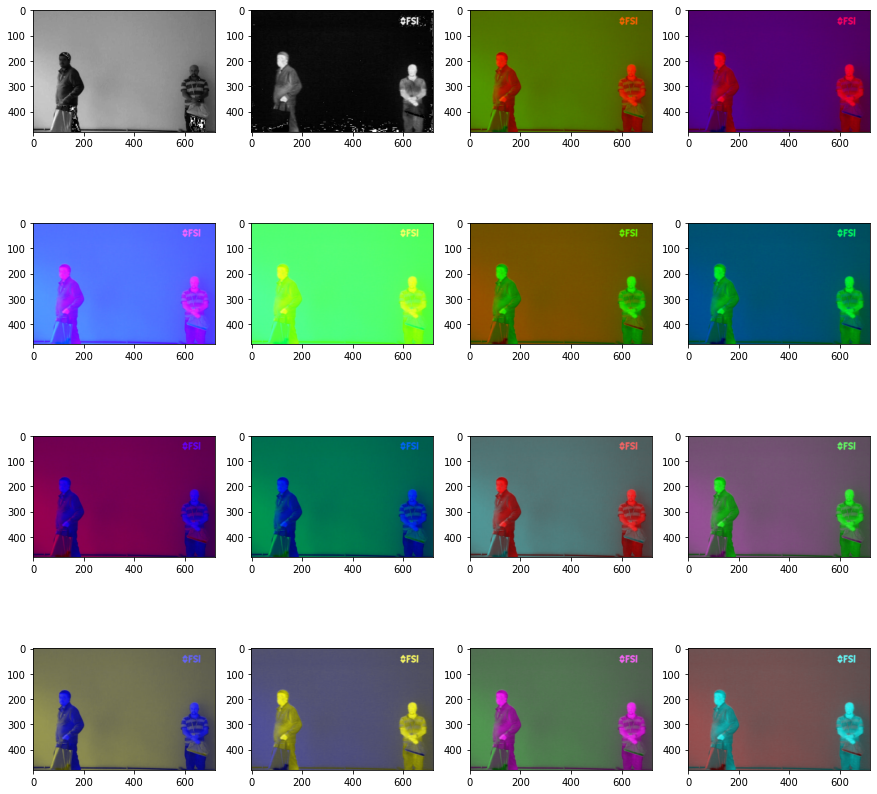

In [60]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(4,4, figsize=(15, 15)) 


axarr = axarr.flatten()

axarr[0].imshow(mosaik1[0], cmap='gray')
axarr[1].imshow(mosaik1[1], cmap='gray')

for i in range(2,16,1):


    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(mosaik1[i])

# Рис. 19.

In [61]:
mosaik2 = []

(480, 720, 4)
(480, 720, 4)


<Figure size 504x360 with 0 Axes>

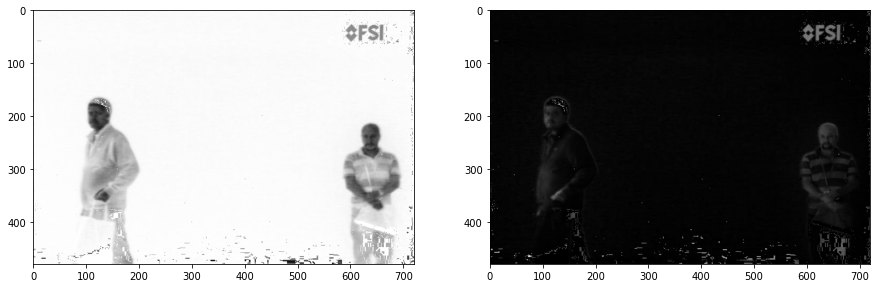

In [62]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2, figsize=(15, 15)) 


i = ir_new
v = vis_new
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)


channels = [(v, v, v, i), (v, v, v, i)]

axarr = axarr.flatten()

facecolors = ['white', 'black']

for i, v in enumerate(channels):
    
    
    rgb_uint8 = (np.dstack(v)).astype(np.uint8) 
    
    print(rgb_uint8.shape)
    
    

    axarr[i].patch.set_facecolor(facecolors[i])
    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(rgb_uint8)
    
    mosaik2.append(rgb_uint8)


In [63]:
! ls

7C71A941-6583-4F77-8D4B-90BB6A3B32F4.jpeg
7EDCE63D-2234-4D07-9384-E8AD572D4497.jpeg
fusion-Copy1.ipynb
fusion.ipynb
pix.png


# Рис. 20.

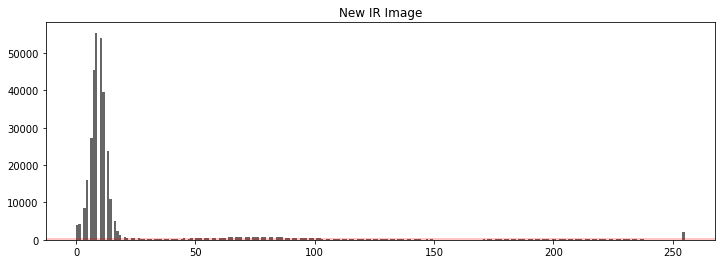

In [64]:
plt.figure(figsize=(12,4))

data = ir_new.ravel()

val_vis, _, _ = plt.hist(data, bins=256, alpha=0.6, color='black')

plt.axhline(y = 150, color = 'r', linestyle = '-', alpha=0.3)


title = "New IR Image" 
plt.title(title)

plt.show()

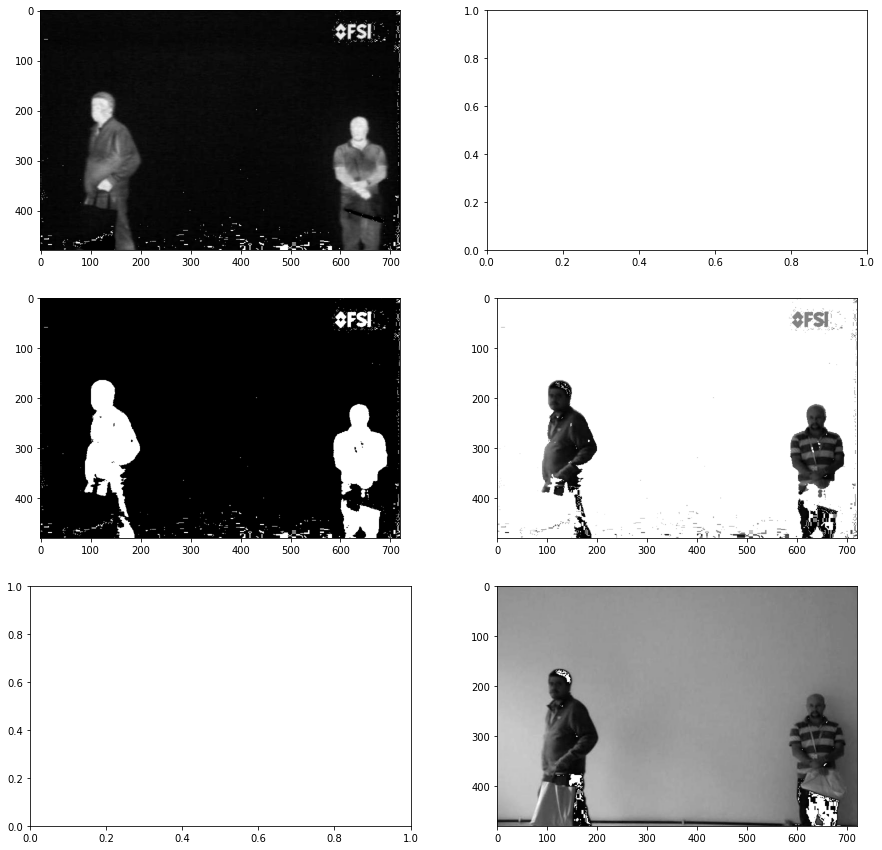

In [65]:
f, axarr = plt.subplots(3,2, figsize=(15, 15)) 

i = ir_new
v = vis_new
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)
# channels = [(i, v, v, i), (i, i, v, i), (i, v, i, i), (irb, v, v, irb), (v, irb, v, irb), (v, v, irb, irb)]
axarr = axarr.flatten()
axarr[0].imshow(ir_new, cmap='gray')

data = ir_new.ravel()
# axarr[1].imshow(plt.hist(data, bins=256, density=True, alpha=0.6, color='black'))

ir_b = np.array(ir_new, dtype='uint8')
th, irb = cv2.threshold(ir_b, 59, 255, cv2.THRESH_BINARY)
axarr[2].imshow(irb, cmap='gray')

i = ir_new
v = vis_new
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)

v = (v, v, v, irb)
synthes_rgb_uint8 = (np.dstack(v)).astype(np.uint8) 
axarr[3].imshow(synthes_rgb_uint8, cmap='gray')

new_img = reg(synthes_rgb_uint8.ravel())
synthes_rgb_uint8_new = np.array(new_img).reshape(480,720,4)
axarr[5].imshow(synthes_rgb_uint8_new)


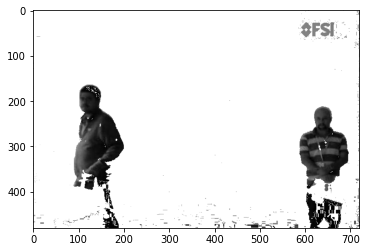

In [66]:
i = ir_img
v = vis_new
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)

v = (v, v, v, irb)
synthes_rgb_uint8 = (np.dstack(v)).astype(np.uint8) 
plt.imshow(synthes_rgb_uint8, cmap='gray')

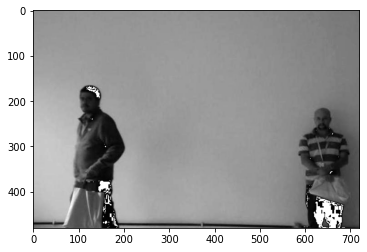

In [69]:
new_img = reg(synthes_rgb_uint8.ravel())
synthes_rgb_uint8_new = np.array(new_img).reshape(480,720,4)
plt.imshow(synthes_rgb_uint8_new, cmap="gray")

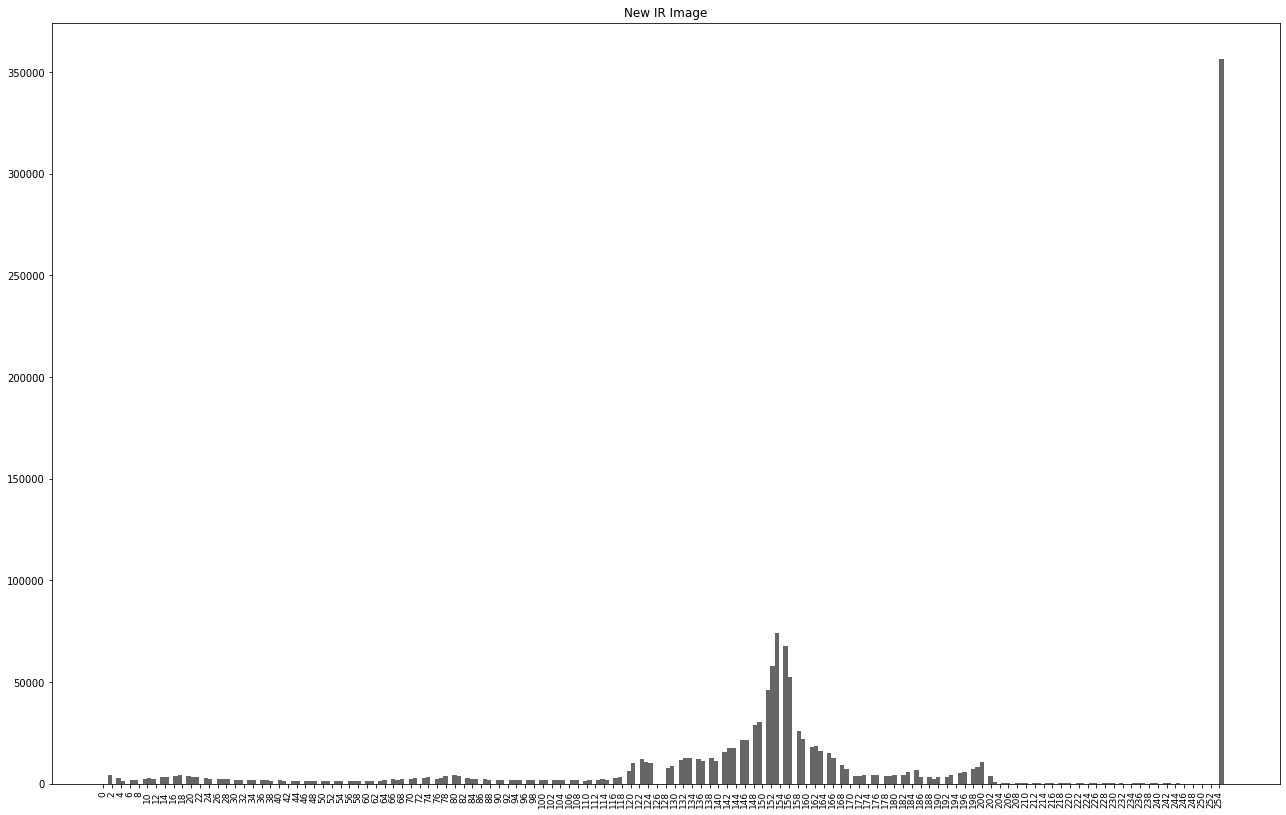

In [70]:
plt.figure(figsize=(22,14))

data = synthes_rgb_uint8_new.ravel()

val_vis, _, _ = plt.hist(data, bins=256, alpha=0.6, color='black')
plt.xticks(range(0,256,2),fontsize=9, rotation=90)

# plt.axhline(y = 150, color = 'r', linestyle = '-', alpha=0.3)


title = "New IR Image" 
plt.title(title)

plt.show()

In [71]:


x = synthes_rgb_uint8_new.ravel()
c = Counter(x)

ans = [(v, prob(c, v,x))  for v in x]

cleans_ans = removeDuplicates(ans)
#     print(cleans_ans[:5])
#     print('min')

sorted_ans = sorted(
cleans_ans, 
key=lambda x: x[1],
reverse=True
)

In [72]:
sorted_ans[:10]

[(255, 0.25787977430555553),
 (153, 0.05371961805555556),
 (155, 0.0489453125),
 (152, 0.04195529513888889),
 (156, 0.0377734375),
 (151, 0.033203125),
 (149, 0.021848958333333335),
 (148, 0.020740017361111113),
 (158, 0.018758680555555556),
 (159, 0.01595486111111111)]

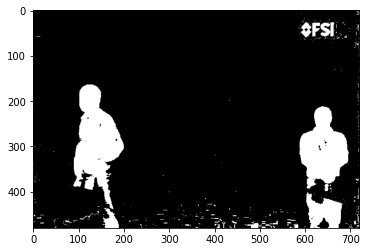

In [107]:
plt.imshow(irb, cmap='gray')

<Figure size 504x360 with 0 Axes>

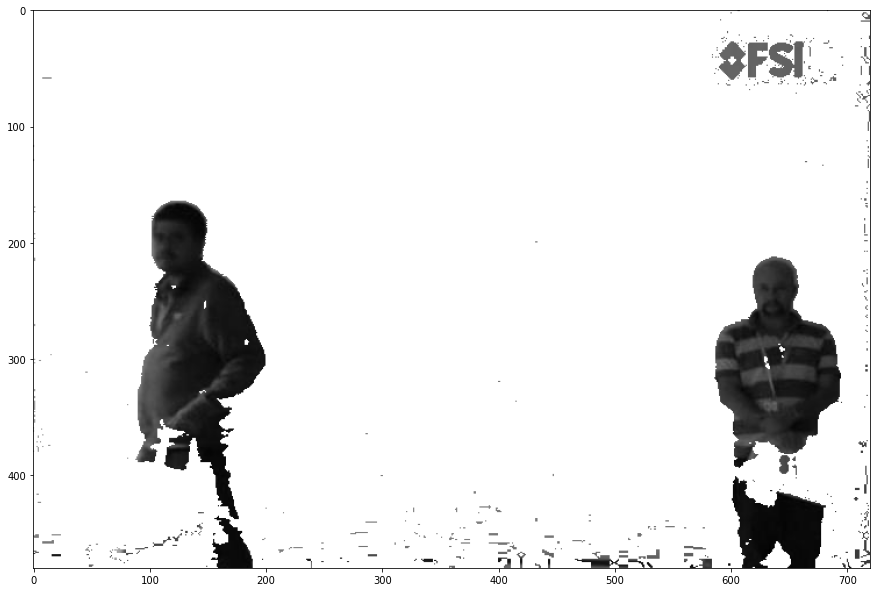

In [108]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,1, figsize=(15, 15)) 


i = ir_img
v = vis_img
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)

v = (v, v, v, irb)
rgb = np.dstack(v)  # stacks 3 h x w arrays -> h x w x 3
synthes_rgb_uint8 = (np.dstack(v)).astype(np.uint8) 



# axarr[i].patch.set_facecolor(facecolors[i])
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr.imshow(synthes_rgb_uint8)


In [109]:
def r_new(img):
    new_img = []
    min_val = val_prob_min(img, 0.004)[0][0]
    max_val = 167
    
    for i in img:
#         print(i, min_val)
        if i < min_val:
            new_img.append(0)
        elif i > min_val and i < max_val:
            val = round((255*(i-min_val))/(max_val-min_val))
            new_img.append(val)
        else:
            new_img.append(255)
            
    return new_img

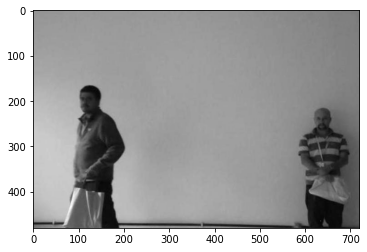

In [110]:
new_img = reg(synthes_rgb_uint8.ravel(), 0.00002)
synthes_rgb_new = np.array(new_img).reshape(480,720,4)
plt.imshow(synthes_rgb_new, cmap="gray")
plt.show()

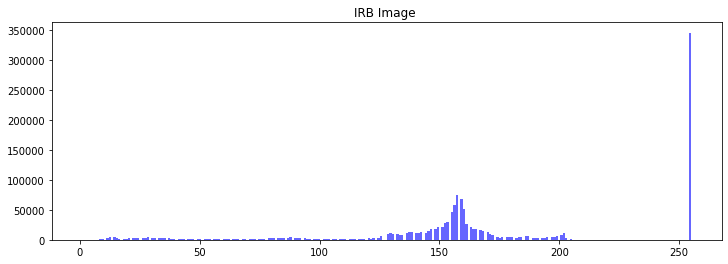

In [111]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))


# Generate some data for this demonstration.
data = synthes_rgb_new.ravel()


val_vis, _, _ = plt.hist(data, bins=256, alpha=0.6, color='b')

title = "IRB Image " 
plt.title(title)


plt.show()

# Рис. 21.

<Figure size 504x360 with 0 Axes>

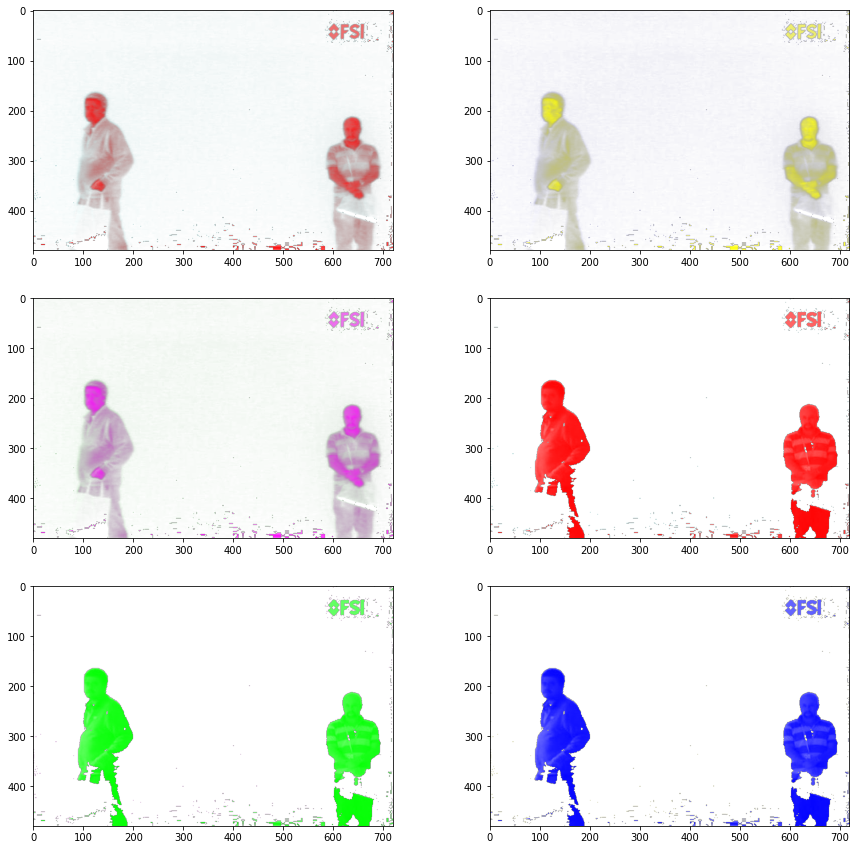

In [113]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,2, figsize=(15, 15)) 


i = ir_new
v = vis_img
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)


channels = [(i, v, v, i), (i, i, v, i), (i, v, i, i), (irb, v, v, irb), (v, irb, v, irb), (v, v, irb, irb)]

axarr = axarr.flatten()


for i, v in enumerate(channels):
    
    rgb_uint8 = (np.dstack(v)).astype(np.uint8)  


    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(rgb_uint8)
    
    mosaik2.append(rgb_uint8)


# Рис. 22.

<Figure size 504x360 with 0 Axes>

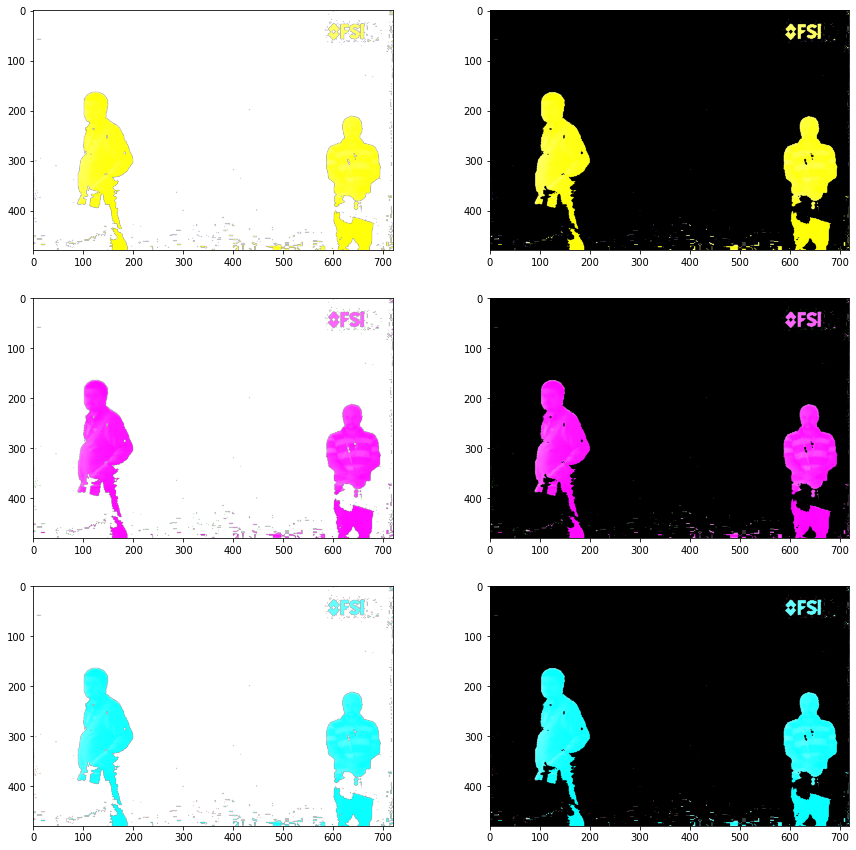

In [30]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,2, figsize=(15, 15)) 


i = ir_img
v = vis_img
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)


channels = [(irb, irb, v, irb), (irb, irb, v, irb), (irb, v, irb, irb), (irb, v, irb, irb), (v,irb, irb, irb), (v, irb, irb, irb)]

axarr = axarr.flatten()

facecolors = ['white', 'black']


for i, v in enumerate(channels):
    
    j = i%2
    axarr[i].patch.set_facecolor(facecolors[j])

    
#     rgb = np.dstack(v)  # stacks 3 h x w arrays -> h x w x 3
    rgb_uint8 = (np.dstack(v)).astype(np.uint8)  # right, Janna, not 256


    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(rgb_uint8)
    
    mosaik2.append(rgb_uint8)


# 25

In [31]:
! ls

7C71A941-6583-4F77-8D4B-90BB6A3B32F4.jpeg
7EDCE63D-2234-4D07-9384-E8AD572D4497.jpeg
fusion-Copy1.ipynb
fusion.ipynb
pix.png


In [32]:
import numpy as np
hsv_img = np.full((480, 720, 3), 11)

In [119]:
np.array(([5] * 4)).reshape(2,2)

array([[5, 5],
       [5, 5]])

In [121]:
lab_image = np.zeros(shape=(480, 720, 3), dtype='uint8')
lab_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

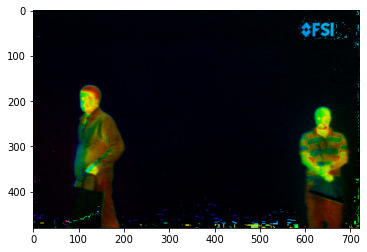

In [122]:

h = vis_img
s = np.array([255] * len(vis_img.ravel())).reshape(480,720)
v = ir_new


lab_image = np.zeros(shape=(480, 720, 3), dtype='uint8')

lab_image[:,:,0] = h
lab_image[:,:,1] = s
lab_image[:,:,2] = v

im_dark = cv2.cvtColor(lab_image, cv2.COLOR_HSV2RGB)


plt.imshow(im_dark)


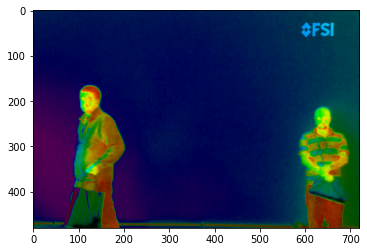

In [123]:
h = vis_img
s = np.array([255] * len(vis_img.ravel())).reshape(480,-1)
v = ir_img


lab_image = np.zeros(shape=(480, 720, 3), dtype='uint8')

lab_image[:,:,0] = h
lab_image[:,:,1] = s
lab_image[:,:,2] = v

# new_img = r(lab_image.ravel())
# lab_2 = np.array(new_img).reshape(480,720, 3).astype('uint8')

im_dark = cv2.cvtColor(lab_image, cv2.COLOR_HSV2RGB)

plt.imshow(im_dark)


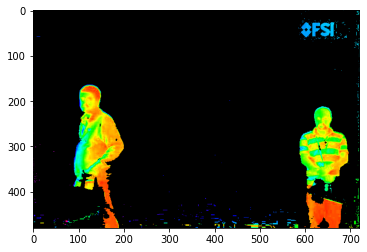

In [124]:
h = vis_img
s = np.array([255] * len(vis_img.ravel())).reshape(480,-1)
v = irb


lab_image3 = np.zeros(shape=(480, 720, 3), dtype='uint8')

lab_image3[:,:,0] = h
lab_image3[:,:,1] = s
lab_image3[:,:,2] = v

im_dark = cv2.cvtColor(lab_image3, cv2.COLOR_HSV2RGB)


plt.imshow(im_dark)



# Рис. 26

In [36]:
# h = np.array([255] * len(vis_img.ravel())).reshape(480,720)
# s = vis_img
# v = ir_new



# lab_image3 = np.zeros(shape=(480, 720, 3), dtype='uint8')

# lab_image3[:,:,0] = h
# lab_image3[:,:,1] = s
# lab_image3[:,:,2] = v

# im_dark = cv2.cvtColor(lab_image3, cv2.COLOR_HSV2RGB)


# plt.imshow(im_dark)



<Figure size 504x360 with 0 Axes>

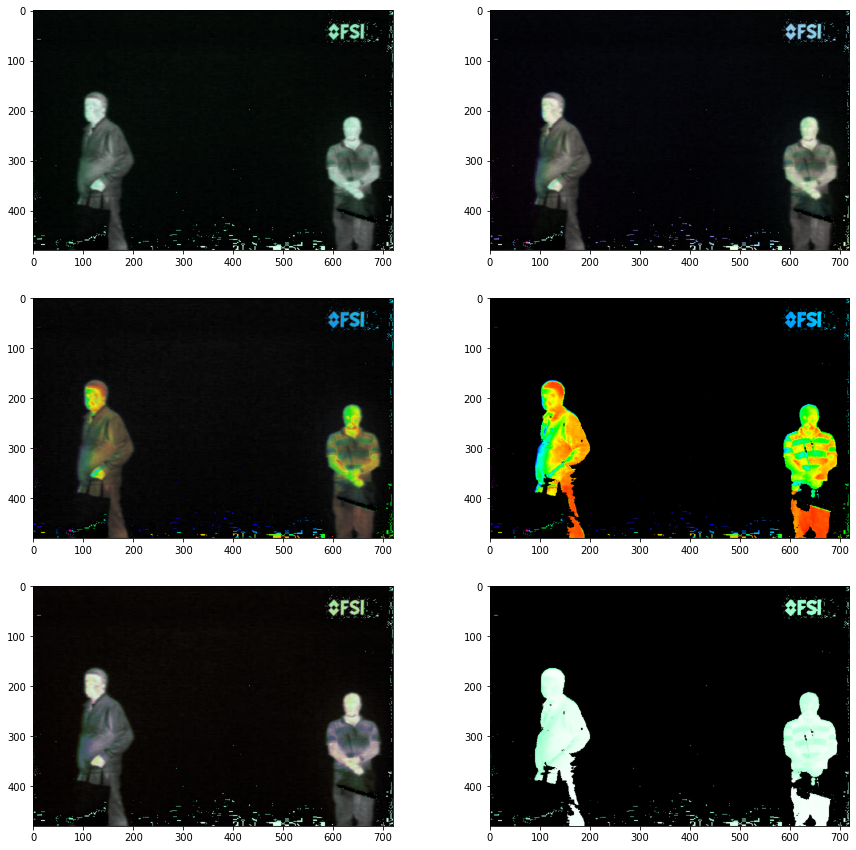

In [125]:
plt.figure(figsize=(7,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,2, figsize=(15, 15)) 


i = ir_new
v = vis_img
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)


channels = [(m, v, i), (v, v, i), (v, i, i), (v, irb, irb), (i,v, i), (irb, v, irb)]

axarr = axarr.flatten()

# facecolors = ['white', 'black']


for i, v in enumerate(channels):
    
    h = v[0]
    s = v[1]
    v = v[2]


    lab_image3 = np.zeros(shape=(480, 720, 3), dtype='uint8')

    lab_image3[:,:,0] = h
    lab_image3[:,:,1] = s
    lab_image3[:,:,2] = v

    im_dark = cv2.cvtColor(lab_image3, cv2.COLOR_HSV2RGB)


#     plt.imshow(im_dark)
    
    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(im_dark)


# 27

In [126]:
345600/480

720.0

<Figure size 1224x360 with 0 Axes>

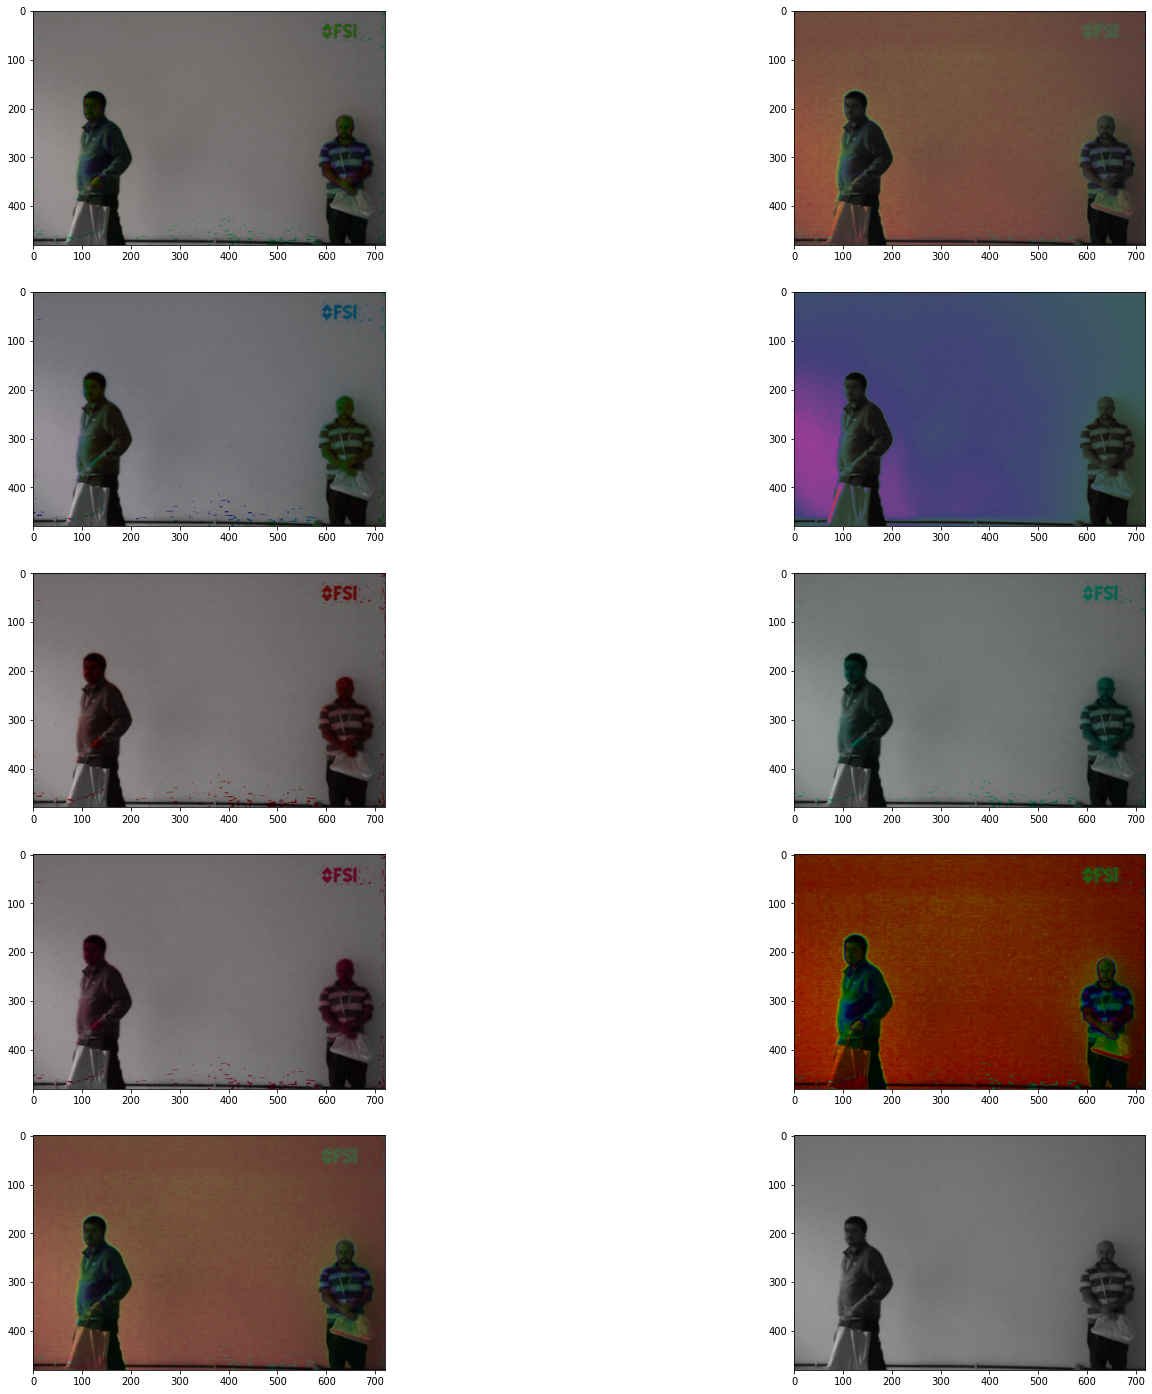

In [128]:
plt.figure(figsize=(17,5))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(5,2, figsize=(25, 25)) 


i = ir_new
v = vis_img
z = np.array([0] * 345600).reshape(480,-1)
m = np.array([255] * 345600).reshape(480,-1)
y = np.array([84] * 345600).reshape(480,-1)
l = np.array([170] * 345600).reshape(480,-1)
k = np.array([127] * 345600).reshape(480,-1)



channels = [(i, i, v), (i, v, v), (v, i, v), (v, v, v), (z,i, v), (y, i, v), (l, i, v), (i, m, v), (i, k, v), (i, z, v)]

axarr = axarr.flatten()

# facecolors = ['white', 'black']


for i, v in enumerate(channels):
    
    h = v[0]
    s = v[1]
    v = v[2]


    lab_image3 = np.zeros(shape=(480, 720, 3), dtype='uint8')

    lab_image3[:,:,0] = h
    lab_image3[:,:,1] = s
    lab_image3[:,:,2] = v

    im_dark = cv2.cvtColor(lab_image3, cv2.COLOR_HSV2RGB)
    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[i].imshow(im_dark)
    
    
#     axarr[i].imshow(lab_image3)


In [129]:
lab_image3 = np.zeros(shape=(480, 720, 3), dtype='uint8')

i = ir_new
v = vis_img
z = np.array([0] * 345600).reshape(480,-1)


lab_image3[:,:,0] = i
lab_image3[:,:,1] = v
lab_image3[:,:,2] = z



In [130]:
lab_image3[:,:,0]

array([[11, 11, 11, ...,  6,  7,  7],
       [10, 11, 11, ...,  4,  6,  6],
       [10, 10, 11, ...,  1,  3,  4],
       ...,
       [ 4,  4,  4, ...,  0,  0,  0],
       [ 4,  4,  4, ...,  0,  0,  0],
       [ 4,  4,  4, ...,  0,  0,  0]], dtype=uint8)

In [131]:
lab_image3.shape

(480, 720, 3)

In [132]:
v = (i, v, z)

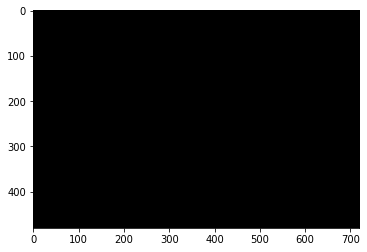

In [134]:
rgb_uint8 = (np.dstack(v)).astype(np.uint8)
im_dark = cv2.cvtColor(rgb_uint8, cv2.COLOR_HSV2RGB)
    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
plt.imshow(im_dark)

In [148]:
h = np.array(([5] * 4)).reshape(2,2)
s = np.array(([2] * 4)).reshape(2,2)
v = np.array(([1] * 4)).reshape(2,2)

In [152]:
h

array([[5, 5],
       [5, 5]])

In [150]:
lab_image3 = np.zeros(shape=(2, 2, 3), dtype='uint8')

lab_image3[:,:,0] = h
lab_image3[:,:,1] = s
lab_image3[:,:,2] = v

In [154]:
lab_image3

array([[[5, 2, 1],
        [5, 2, 1]],

       [[5, 2, 1],
        [5, 2, 1]]], dtype=uint8)

In [157]:
rgb_uint8 = (np.dstack((h,s,v))).astype(np.uint8)  # right, Janna, not 256
rgb_uint8

array([[[5, 2, 1],
        [5, 2, 1]],

       [[5, 2, 1],
        [5, 2, 1]]], dtype=uint8)